In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sdss.metadata import MetaData

meta = MetaData()
%matplotlib inline
plt.rcParams["text.usetex"] = False

In [2]:
meta_data_directory = "/home/edgar/spectra/0_01_z_0_5_4_0_snr_inf"
scores_directory = (
    f"{meta_data_directory}/bin_04/explanation/256_128_64/latent_12"
)
wave = np.load(f"{meta_data_directory}/wave.npy")

In [3]:
scores_names = {
    "correlation": "Correlation",
    "correlation_filter_250kms": "Correlation (250 km s$^{-1}$ filter)",
    "cosine": "Cosine disimilarity score",
    "cosine_filter_250kms": "Cosine disimilarity (250 km s$^{-1}$ filter)",
    "lp_noRel100": "$L^p$",
    "lp_filter_250kms_noRel100": "$L^p$ (250 km s$^{-1}$ filter)",
    "lp_noRel97": "$L^p$ (ignore 3% of largest residuals)",
    "lp_filter_250kms_noRel97": "$L^p$ (250 km s$^{-1}$ filter, ignore 3% of largest residuals)",
    "lp_rel100": "$L^p$ relative",
    "lp_filter_250kms_rel100": "$L^p$ relative (250 km s$^{-1}$ filter)",
    "lp_rel97": "$L^p$ relative (ignore 3% of largest residuals)",
    "lp_filter_250kms_rel97": "$L^p$ relative (250 km s$^{-1}$ filter, ignore 3% of largest residuals)",
    # "mse_noRel100": "MSE score",
    # "mse_filter_250kms_noRel100": "MSE score with a 250 kms filter",
    # "mse_noRel97": "MSE score ignoring 3% of largest residuals",
    # "mse_filter_250kms_noRel97": "MSE score ignoring 3% of largest residuals with a 250 kms filter",
    # "mse_rel100": "MSE relative score",
    # "mse_filter_250kms_rel100": "MSE relative score with a 250 kms filter",
    # "mse_rel97": "MSE relative score\n ignoring 3% of largest residuals",
    # "mse_filter_250kms_rel97": "MSE relative score ignoring 3% of largest residuals with a 250 kms filter"
}
scores = {}
df_scores = {}

for metric in scores_names.keys():

    scores[metric] = np.load(
        f"{scores_directory}/{metric}/top_anomalies.npy", mmap_mode="r"
    )

    df_scores[metric] = pd.read_csv(
        f"{scores_directory}/{metric}/top_anomalies.csv.gz",
        index_col="specobjid",
    )

/tmp/ipykernel_36780/4184880554.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(f"{save_to}/{plot_name}.pdf")
/tmp/ipykernel_36780/4184880554.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(f"{save_to}/{plot_name}.pdf")
/tmp/ipykernel_36780/4184880554.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(f"{save_to}/{plot_name}.pdf")
/tmp/ipykernel_36780/4184880554.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(f"{save_to}/{plot_name}.pdf")
/tmp/ipykernel_36780/4184880554.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(f"{save_to}/{plot_name}.pdf")
/tmp/ipykernel_36780

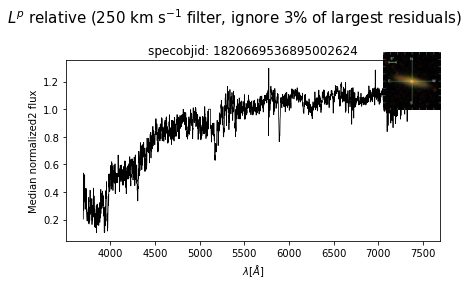

In [11]:
rank = -1000
save_to = "/home/edgar/explain-me-why/sections/figures/score/lunch"
# fig, ax = plt.subplots(figsize=(20, 12, tight_layout=True)
fig, ax = plt.subplots(tight_layout=True)

for metric in scores_names.keys():

    specobjid = df_scores[metric].index[rank]

    # Download sdss image
    ra = df_scores[metric].loc[specobjid, "ra"]
    dec = df_scores[metric].loc[specobjid, "dec"]
    meta.get_sdss_image(
        specobjid=specobjid,
        coordinates=(ra, dec),
        save_to=save_to,
        image_format="pdf",
    )

    ax.clear()

    # fig.suptitle(f"{scores_names[metric]}\nRank: {abs(rank)}th", fontsize=15)
    fig.suptitle(f"{scores_names[metric]}", fontsize=15)
    ax.title.set_text(f"specobjid: {specobjid}")

    ax.set_xlabel("$\lambda [\AA]$")
    ax.set_ylabel("Median normalized2 flux")

    ax.plot(
        wave,
        scores[metric][rank],
        color="black",  # label=f"specobjid: {specobjid}"
        lw=0.75,
    )

    # plot image
    galaxy_image = plt.imread(f"{save_to}/{specobjid}.pdf")
    image_axis = fig.add_axes([0.81, 0.62, 0.2, 0.2])
    image_axis.imshow(galaxy_image)
    image_axis.axis("off")

    plot_name = f"rank_{abs(rank)}_{metric}"
    # fig.savefig(f"{save_to}/{plot_name}.png")
    fig.savefig(f"{save_to}/{plot_name}.pdf")